<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_43_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agrupar perfiles de sueño

## 💤 Análisis de Perfiles de Sueño con K-Means

Una empresa especializada en salud del sueño desea analizar los **hábitos de descanso de cientos de personas.**

Se han recogido datos sobre cómo duermen los usuarios, y ahora tu misión es **agrupar a los individuos en diferentes tipos de "dormidores"** usando aprendizaje no supervisado.



## 🎯 Objetivo

Crear un sistema en Python que genere perfiles de sueño sintéticos, los agrupe en 3 categorías usando **K-Means Clustering**, y visualice los resultados.



## 🧩 Estructura que debes seguir

+ 1. **SleepProfile**: Clase que representa el perfil de sueño de una persona.

  + Atributos:

    + duration: duración promedio del sueño en horas (ej. 7.5)

    + latency: tiempo promedio para quedarse dormido en minutos (ej. 25)

    + wakeups: cantidad de despertares durante la noche (ej. 2)

    + variability: variabilidad en la hora de irse a dormir, en minutos (ej. 35)

  + Métodos:

   + to_vector(self): Devuelve la información del perfil como una lista [duration, latency, wakeups, variability].

<br>
<br>

+ 2. **SleepDatasetGenerator**:Clase que genera una lista de objetos SleepProfile con datos sintéticos y realistas.

  + Constructor:

    + __init__(self, n=300): genera n perfiles (por defecto 300).

  + MétodoS:

    + generate(self): retorna una lista de objetos SleepProfile, donde los atributos se generan así:

      + duration: distribución normal con media 7 horas y desviación estándar 1.2 → np.random.normal(7, 1.2, n)

      + latency: distribución normal positiva (usar np.abs) con media 20 y std 10

      + wakeups: distribución Poisson con media 1.5 → np.random.poisson(1.5, n)

      + variability: distribución normal positiva con media 30 y std 15

<br>
<br>


3. **SleepClusterer**: Clase que entrena un modelo K-Means y agrupa los perfiles.

  + Constructor:

    + __init__(self, n_clusters=3): crea un modelo KMeans con 3 clústeres y un StandardScaler para escalar los datos antes de entrenar.

  + Métodos:

    + fit(self, profiles): recibe una lista de SleepProfile, los convierte a vectores, normaliza con StandardScaler y entrena el modelo. Retorna X_scaled y las etiquetas de clúster (labels).

    + get_cluster_centers(self): devuelve los centros de clúster transformados a su escala original (usa scaler.inverse_transform).

<br>
<br>


4. **SleepAnalysisExample**:Clase que ejecuta todo el análisis.

  + Método:

    + run(self):

      + 1.- Genera los perfiles usando SleepDatasetGenerator.

      + 2.- Agrupa los perfiles usando SleepClusterer con 3 grupos.

      + 3.- Crea un DataFrame para mostrar resultados.

      + 4.- Imprime los centroides (promedios de cada grupo).

      + 5.- Grafica los perfiles usando matplotlib (eje X: duración, eje Y: variabilidad).



## 🛠 Requisitos mínimos

+ Usar numpy para generar datos sintéticos.
+ Usar scikit-learn para KMeans y StandardScaler.
+ Usar matplotlib para graficar los resultados.
+ Organizar el código en clases separadas como se indica.
+ Mostrar en consola los centroides de cada grupo.
+ Graficar los grupos usando diferentes colores.



## 📈 ¿Qué deberías mostrar al final?

+ 1.- Los **centroides de los grupos**, interpretando lo que caracteriza a cada uno.

+ 2.- Un **gráfico de dispersión** donde se vea la agrupación de perfiles por:

  + Eje X: Duración del sueño
  + Eje Y: Variabilidad de hora de dormir

+ 3.- Comentarios sobre posibles tipos de durmientes: ¿hay un grupo de "insomnes"? ¿otro de "buenos durmientes"?



## 🧪 Ejemplo de uso
```PYTHON
example = SleepAnalysisExample()
example.run()
```

## Salida esperada
```python
📌 Centroides de los grupos:
Grupo 0: Duración=6.30h, Latencia=19.3min, Despertares=1.2, Variabilidad=39.6min
Grupo 1: Duración=6.79h, Latencia=18.9min, Despertares=3.4, Variabilidad=26.5min
Grupo 2: Duración=7.98h, Latencia=18.6min, Despertares=1.0, Variabilidad=22.3min
```

## Importación de librerías

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import unittest

## Definición de la clase SleepProfile

In [230]:
class SleepProfile:
    """
    Representa el perfil de sueño de una persona.

    Args:
        duration (float): Duración promedio del sueño en horas.
        latency (float): Tiempo promedio para quedarse dormido en minutos.
        wakeups (float): Cantidad de despertares durante la noche.
        variability (float): Variabilidad en hora de ir a dormir, en minutos.

    Raises:
        TypeError: Si alguno de los atributos no es numérico.
        ValueError: Si alguno de los atributos es negativo.
    """
    def __init__(self, duration:float, latency:float, \
                 wakeups:float, variability:float):

      if not isinstance(duration, (int, float, np.integer, np.floating)) or \
      not isinstance(latency, (int, float, np.integer, np.floating)) or \
      not isinstance(wakeups, (int, float, np.integer, np.floating)) or \
      not isinstance(variability, (int, float, np.integer, np.floating)):
        raise TypeError("Los atributos deben ser números.")
      if duration < 0 or latency < 0 or wakeups < 0 or variability < 0:
        raise ValueError("Los atributos deben ser números positivos.")

      self.duration = duration
      self.latency = latency
      self.wakeups = wakeups
      self.variability = variability

    def to_vector(self)->list:
      """
        Convierte la información del perfil a una lista de atributos numéricos.

        Returns:
            list: De atributos [duration, latency, wakeups, variability].
      """
      return [self.duration, self.latency, self.wakeups, self.variability]

In [231]:
sleeper = SleepProfile(7.290242606936291, 16.531001439886875, 1, 36.98450695618974)
sleeper.to_vector()

[7.290242606936291, 16.531001439886875, 1, 36.98450695618974]

#### Tests para la clase SleepProfile

In [232]:
class TestSleepProfile(unittest.TestCase):

    def test_sleep_profile_creation(self):
        """Test that a SleepProfile object is created correctly."""
        profile = SleepProfile(duration=7.5, latency=20.0, wakeups=1.0, variability=30.0)
        self.assertEqual(profile.duration, 7.5)
        self.assertEqual(profile.latency, 20.0)
        self.assertEqual(profile.wakeups, 1.0)
        self.assertEqual(profile.variability, 30.0)

    def test_sleep_profile_creation_with_integers(self):
        """Test that a SleepProfile object is created correctly with integers."""
        profile = SleepProfile(duration=7, latency=20, wakeups=1, variability=30)
        self.assertEqual(profile.duration, 7)
        self.assertEqual(profile.latency, 20)
        self.assertEqual(profile.wakeups, 1)
        self.assertEqual(profile.variability, 30)

    def test_sleep_profile_creation_invalid_type(self):
        """Test that creating a SleepProfile with invalid types raises a TypeError."""
        with self.assertRaises(TypeError):
            SleepProfile(duration="seven", latency=20.0, wakeups=1.0, variability=30.0)
        with self.assertRaises(TypeError):
            SleepProfile(duration=7.5, latency="twenty", wakeups=1.0, variability=30.0)
        with self.assertRaises(TypeError):
            SleepProfile(duration=7.5, latency=20.0, wakeups="one", variability=30.0)
        with self.assertRaises(TypeError):
            SleepProfile(duration=7.5, latency=20.0, wakeups=1.0, variability="thirty")

    def test_sleep_profile_creation_negative_value(self):
        """Test that creating a SleepProfile with negative values raises a ValueError."""
        with self.assertRaises(ValueError):
            SleepProfile(duration=-7.5, latency=20.0, wakeups=1.0, variability=30.0)
        with self.assertRaises(ValueError):
            SleepProfile(duration=7.5, latency=-20.0, wakeups=1.0, variability=30.0)
        with self.assertRaises(ValueError):
            SleepProfile(duration=7.5, latency=20.0, wakeups=-1.0, variability=30.0)
        with self.assertRaises(ValueError):
            SleepProfile(duration=7.5, latency=20.0, wakeups=1.0, variability=-30.0)

    def test_to_vector_method(self):
        """Test that the to_vector method returns the correct list."""
        profile = SleepProfile(duration=7.5, latency=20.0, wakeups=1.0, variability=30.0)
        self.assertEqual(profile.to_vector(), [7.5, 20.0, 1.0, 30.0])


In [233]:
loader = unittest.TestLoader()
suite = loader.loadTestsFromTestCase(TestSleepProfile)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_sleep_profile_creation (__main__.TestSleepProfile.test_sleep_profile_creation)
Test that a SleepProfile object is created correctly. ... ok
test_sleep_profile_creation_invalid_type (__main__.TestSleepProfile.test_sleep_profile_creation_invalid_type)
Test that creating a SleepProfile with invalid types raises a TypeError. ... ok
test_sleep_profile_creation_negative_value (__main__.TestSleepProfile.test_sleep_profile_creation_negative_value)
Test that creating a SleepProfile with negative values raises a ValueError. ... ok
test_sleep_profile_creation_with_integers (__main__.TestSleepProfile.test_sleep_profile_creation_with_integers)
Test that a SleepProfile object is created correctly with integers. ... ok
test_to_vector_method (__main__.TestSleepProfile.test_to_vector_method)
Test that the to_vector method returns the correct list. ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.010s

OK


## Definición de la clase SleepDatasetGenerator

In [234]:
class SleepDatasetGenerator:
    """
    Genera una lista de objetos SleepProfile con datos sintéticos y realistas.

    Crea perfiles de sueño sintéticos utilizando distribuciones estadísticas
    para simular los diferentes atributos del sueño de una persona.

    Args:
        n (int): Número de perfiles a generar (por defecto 300).
                 Debe ser un entero positivo.

    Raises:
        TypeError: Si n no es un entero.
        ValueError: Si n es menor o igual a cero.
    """
    def __init__(self, n=300):
        if not isinstance(n, int):
            raise TypeError("El número de perfiles 'n' debe ser un entero.")
        if n <= 0:
            raise ValueError("El número de perfiles 'n' debe ser positivo.")
        self.n = n

    def generate(self)-> list :
        """
        Genera una lista de objetos SleepProfile con datos sintéticos.

        Los atributos de los perfiles se generan de la siguiente manera:
        - duration   : Distribución normal de media 7 y desviación estándar 1.2.
        - latency    : Distribución normal positiva (absoluto) de media 20
                       y desviación estándar 10.
        - wakeups    : Distribución de Poisson de media 1.5.
        - variability: Distribución normal positiva (absoluto) de media 30
                       y desviación estándar 15.

        Returns:
            list: Una lista de objetos SleepProfile generados.
        """
        profiles = []

        # Generar datos para atributo utilizando distribuciones estadísticas
        durations = np.random.normal(7, 1.2, self.n)
        # np.abs asegura que la latencia y variabilidad sean positivas
        latencies = np.abs(np.random.normal(20, 10, self.n))
        wakeups = np.random.poisson(1.5, self.n)
        variabilities = np.abs(np.random.normal(30, 15, self.n))

        # Crear objetos SleepProfile con los datos generados
        for i in range(self.n):
          # Crear un objeto SleepProfile con los atributos generados
          data = SleepProfile(durations[i], latencies[i], wakeups[i], variabilities[i])
          profiles.append(data)
        return profiles

In [235]:
sdg = SleepDatasetGenerator()
profiles = sdg.generate()

## Definición de la clase SleepClusterer

In [236]:
class SleepClusterer:
  """
    Clase que entrena un modelo K-Means y agrupa los perfiles de sueño.

    Esta clase se encarga de preprocesar los datos de los perfiles de sueño
    (escalar) y luego aplicar el algoritmo K-Means para encontrar grupos
    (clústeres) con características similares.

    Args:
        n_clusters (int): El número de clústeres a formar (por defecto 3).
                          Debe ser un entero positivo.

    Raises:
        TypeError: Si n_clusters no es un entero.
        ValueError: Si n_clusters es menor o igual a cero.
  """

  def __init__(self, n_clusters=3):

    if not isinstance(n_clusters, int):
      raise TypeError("El número de clústeres 'n_clusters' debe ser un entero.")
    if n_clusters <= 0:
      raise ValueError("El número de clústeres 'n_clusters' debe ser positivo.")

    self.n_clusters = n_clusters
    # StandardScaler para normalizar los datos antes de aplicar K-Means
    self.scaler = StandardScaler()
    # Modelo K-Means para agrupar los datos
    self.kmeans = KMeans(n_clusters=n_clusters)

  def fit(self, profiles:list):
    """
        Escala los perfiles de sueño y entrena el modelo K-Means.

        Recibe lista de objetos SleepProfile, los vectoriza y los
        escala utilizando StandardScaler y entrena el modelo K-Means.

        Args:
            profiles (list): Una lista de objetos SleepProfile.

        Returns:
            tuple: Una tupla que contiene:
                   - numpy.ndarray: Los datos de los perfiles escalados.
                   - numpy.ndarray: Las etiquetas de clúster asignadas.
    """
    scaled_profiles = self.scaler.fit_transform([profile.to_vector() for profile in profiles])
    self.kmeans.fit(scaled_profiles)
    return scaled_profiles, self.kmeans.labels_

  def get_cluster_centers(self):
    """
        Devuelve los centroides de los clústeres en su escala original.

        Después de entrenar el modelo K-Means con datos escalados, esta función
        invierte la transformación para obtener los centroides en la escala original
        de los atributos del perfil de sueño.

        Returns:
            numpy.ndarray: Una matriz donde cada fila es el centroide de un clúster
                           en la escala original.
    """
    return self.scaler.inverse_transform(self.kmeans.cluster_centers_)

## Definición de la clase SleepAnalysisExample

In [237]:
class SleepAnalysisExample:
  def run(self):
    # 1. Genera los perfiles usando SleepDatasetGenerator
    n = 300
    generator = SleepDatasetGenerator(n = 300)
    profiles = generator.generate()
    profiles_list = [profile.to_vector() for profile in profiles]

    # 2. Agrupa los perfiles usando SleepCluster
    clusterer = SleepClusterer()
    scaled_profiles, labels = clusterer.fit(profiles)
    centroides = clusterer.get_cluster_centers()

    colores_grupo = {0:'blue', 1:'green', 2:'red'}
    # 3. Crea un DataFrame para graficar los datos sin scalar
    df = pd.DataFrame(profiles_list, columns=['duration', 'latency', 'wakeups', 'variability'])
    df['cluster'] = labels

    # 4. Imprime los centroides
    print("📌 Centroides de los grupos:")
    for i, center in enumerate(centroides):
      print(f"Grupo {i}: Duración={center[0]:.2f}h, Latencia={center[1]:.1f}min, \
       Despertares={center[2]:.1f}, Variabilidad={center[3]:.1f}min")

    # 5. Grafica los perfiles originales
    plt.scatter(df['duration'], df['variability'], c=df['cluster'].map(colores_grupo), alpha=0.1)
    # 6 grafica los centroides
    for i, center in enumerate(centroides):
      print(i, colores_grupo[i])
      plt.scatter(x=center[0], y=center[3], c=colores_grupo[i], marker='*', s=150)

    plt.xlabel('Duración del sueño (horas)')
    plt.ylabel('Variabilidad de hora de dormir (minutos)')
    plt.title('Agrupación de perfiles de sueño agrupados (k_means)')

## Ejemplo de uso

📌 Centroides de los grupos:
Grupo 0: Duración=6.38h, Latencia=25.2min,        Despertares=0.7, Variabilidad=21.1min
Grupo 1: Duración=7.73h, Latencia=17.3min,        Despertares=1.0, Variabilidad=37.4min
Grupo 2: Duración=6.73h, Latencia=20.7min,        Despertares=2.7, Variabilidad=26.8min
0 blue
1 green
2 red


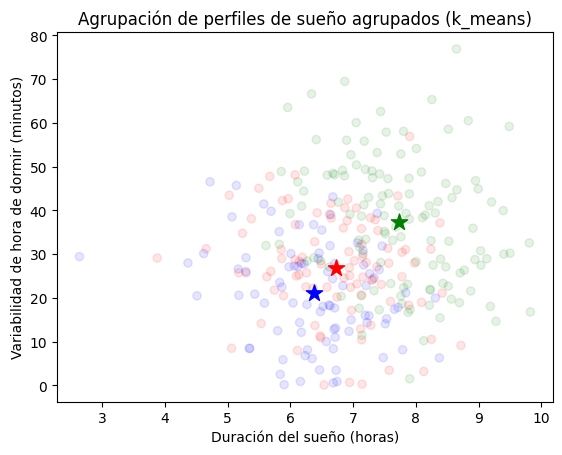

In [238]:
example = SleepAnalysisExample()
example.run()